## IBM PROFESSIONAL CERTIFICATION IN DATA SCIENCE CAPSTONE - PART 2: DECODING DUBLIN THROUGH DATA
## Dublin House Pricing Analysis

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import folium
%matplotlib inline

In [4]:
df_House = pd.read_excel('Dublin_House_Price_PSRA.xlsx')

In [5]:
df_House.shape

(5368, 7)

In [6]:
df_House = df_House.drop(['vat_exclusive','year','sale_date'], axis = 1)
df_House['postal_code'].fillna('None', inplace=True)
df_House = df_House[df_House['postal_code'] != 'None']
df_House = df_House[df_House['not_full_market_price'] == 'No']
df_House = df_House.drop(['not_full_market_price'], axis = 1)
df_House.reset_index(drop = True, inplace = True)
df_House.head()

address postal_code      price
0  Calmount Park, Calmount Ave, Ballymount, Dubli...   Dublin 15   445475.0
1  Alexander Court, Pembroke Street Upper, Dublin...    Dublin 2  7750000.0
2        1 Belmont Park, Dublin 4, D04 P8E2, Ireland    Dublin 4   660000.0
3  1 Bolbrook Ave, Tymon South, Dublin 24, D24 Y9...   Dublin 24   239000.0
4  3 Boyne House, Custom House Square, Mayor Stre...    Dublin 1   280000.0

#### NOTE: The below code is typically used to get the Latitude and Longitude for the addresses in the dataframe above, however due to the large number of addresses and Geocoders tendency to be unstable, time out and not like certain addresses I will instead simply read in the latitude and longitude data that has previously been run. Thus I have commented the below code out for the time being.

In [111]:
'''
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
def do_geocode(address):
    geolocator = Nominatim(user_agent="foursquare_agent")
    try:
        return  geolocator.geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)
    
for index, row in df_House.iterrows():
    address = df_House.iloc[index]['address']
    location = do_geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    
    
    df_House.iloc[index]['Latitude'] = latitude
    df_House.iloc[index]['Longitude'] = longitude
df_House'''

'\nfrom geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values\ndef do_geocode(address):\n    geolocator = Nominatim(user_agent="foursquare_agent")\n    try:\n        return  geolocator.geocode(address)\n    except GeocoderTimedOut:\n        return do_geocode(address)\n    \nfor index, row in df_House.iterrows():\n    address = df_House.iloc[index][\'address\']\n    location = do_geocode(address)\n    latitude = location.latitude\n    longitude = location.longitude\n    \n    \n    df_House.iloc[index][\'Latitude\'] = latitude\n    df_House.iloc[index][\'Longitude\'] = longitude\ndf_House'

In [7]:
Lat_Long = pd.read_excel('Lat_Long.xlsx')
Lat_Long = Lat_Long.drop(['address'], axis = 1)
df_House = df_House.join(Lat_Long)
df_House.head()

address postal_code      price  \
0  Calmount Park, Calmount Ave, Ballymount, Dubli...   Dublin 15   445475.0   
1  Alexander Court, Pembroke Street Upper, Dublin...    Dublin 2  7750000.0   
2        1 Belmont Park, Dublin 4, D04 P8E2, Ireland    Dublin 4   660000.0   
3  1 Bolbrook Ave, Tymon South, Dublin 24, D24 Y9...   Dublin 24   239000.0   
4  3 Boyne House, Custom House Square, Mayor Stre...    Dublin 1   280000.0   

    latitude  longitude  
0  53.312959  -6.345802  
1  53.334872  -6.254379  
2  53.322400  -6.238416  
3  53.286741  -6.341993  
4  53.349353  -6.242606

### Removing all house data with prices > 2 million euro and less than 50,000 euro

In [8]:
df_House = df_House[df_House['price'] < 2000000]
df_House = df_House[df_House['price'] > 50000]

### Getting an idea of the spread of house prices with the boxplot below

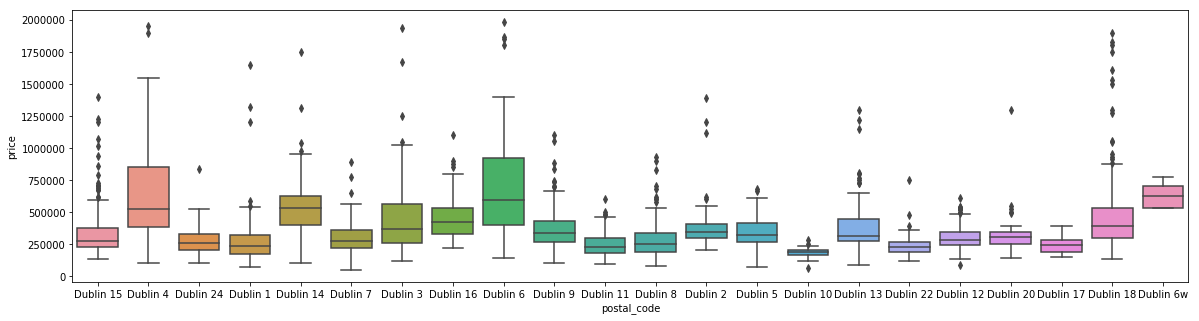

In [9]:
plt.figure(figsize=(20,5))
sns.boxplot(x="postal_code", y="price", data=df_House)

### Creating 5 'Buckets' for house prices between 50,000 euro and 2 million euro 

In [10]:
df_House['marker_colour'] = pd.cut(df_House['price'], bins=5, 
                              labels=['blue', 'green', 'yellow', 'red','purple'])

In [11]:
# create map and display it
latitude = 53.3497645 
longitude = -6.2602732


Dublin_map = folium.Map(location=[latitude, longitude], zoom_start=12)
for index, row in df_House.iterrows():
    folium.CircleMarker(
        [row['latitude'], row['longitude']],
        radius=3,
        fill = True,
        color=row['marker_colour'],
        fill_opacity=0.6
    ).add_to(Dublin_map)
Dublin_map

In [12]:
df_House.head()

address postal_code     price  \
0  Calmount Park, Calmount Ave, Ballymount, Dubli...   Dublin 15  445475.0   
2        1 Belmont Park, Dublin 4, D04 P8E2, Ireland    Dublin 4  660000.0   
3  1 Bolbrook Ave, Tymon South, Dublin 24, D24 Y9...   Dublin 24  239000.0   
4  3 Boyne House, Custom House Square, Mayor Stre...    Dublin 1  280000.0   
5  1 Brookmount Ave, Balrothery, Dublin 24, D24 W...   Dublin 24  240000.0   

    latitude  longitude marker_colour  
0  53.312959  -6.345802         green  
2  53.322400  -6.238416         green  
3  53.286741  -6.341993          blue  
4  53.349353  -6.242606          blue  
5  53.290726  -6.334653          blue

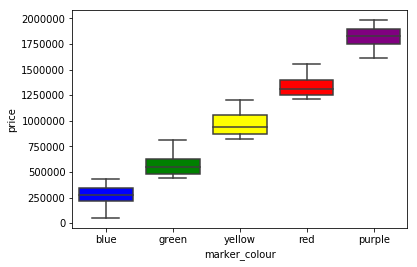

In [18]:
bplot = sns.boxplot(x="marker_colour", y="price", data=df_House)
color_dict = ['blue', 'green', 'yellow', 'red','purple']
for i in range(0,5):
    mybox = bplot.artists[i]
    mybox.set_facecolor(color_dict[i])
mybox

In [15]:
df_House['marker_colour'].value_counts()

blue      2296
green      622
yellow     113
red         38
purple      15
Name: marker_colour, dtype: int64

### Decided that 2 million euro is too much, narrowing the analysis to less than 1 million euro

In [16]:
df_Capped = df_House[df_House['price'] <= 1000000]

#### Recallibrating buckets

In [17]:
df_Capped['marker_colour'] = pd.cut(df_Capped['price'], bins=5, 
                              labels=['blue', 'green', 'yellow', 'red','purple'])

df_Capped.head()

C:\Users\keegan.moore\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


address postal_code     price  \
0  Calmount Park, Calmount Ave, Ballymount, Dubli...   Dublin 15  445475.0   
2        1 Belmont Park, Dublin 4, D04 P8E2, Ireland    Dublin 4  660000.0   
3  1 Bolbrook Ave, Tymon South, Dublin 24, D24 Y9...   Dublin 24  239000.0   
4  3 Boyne House, Custom House Square, Mayor Stre...    Dublin 1  280000.0   
5  1 Brookmount Ave, Balrothery, Dublin 24, D24 W...   Dublin 24  240000.0   

    latitude  longitude marker_colour  
0  53.312959  -6.345802        yellow  
2  53.322400  -6.238416           red  
3  53.286741  -6.341993          blue  
4  53.349353  -6.242606         green  
5  53.290726  -6.334653          blue

In [18]:
df_Capped['marker_colour'].value_counts()

green     1488
blue       791
yellow     478
red        161
purple      70
Name: marker_colour, dtype: int64

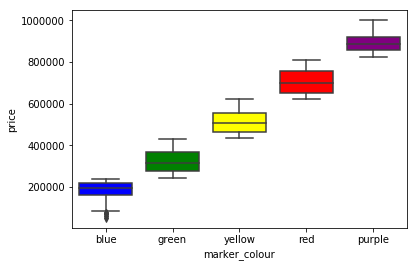

In [24]:
bplot = sns.boxplot(x="marker_colour", y="price", data=df_Capped)
color_dict = ['blue', 'green', 'yellow', 'red','purple']
for i in range(0,5):
    mybox = bplot.artists[i]
    mybox.set_facecolor(color_dict[i])
mybox

In [19]:
df_coords = pd.read_excel('Dublin_Coords.xlsx')

### Map of house coords with respective bucket colour, and the coords of the various Dublin areas

In [20]:
# create map and display it
latitude = 53.3497645 
longitude = -6.2602732


Dublin_map = folium.Map(location=[latitude, longitude], zoom_start=12)
for index, row in df_Capped.iterrows():
    folium.CircleMarker(
        [row['latitude'], row['longitude']],
        radius=3,
        fill = True,
        color=row['marker_colour'],
        fill_opacity=0.6
    ).add_to(Dublin_map)
for index, row in df_coords.iterrows():
    folium.CircleMarker(
        [row['Latitude'], row['Longitude']],
        radius= 15,
        fill = True,
        color= 'orange',
        fill_opacity=0.3
    ).add_to(Dublin_map)
    
Dublin_map

In [24]:
df_avgprice = pd.DataFrame(df_House.groupby('postal_code')['price'].mean())
df_avgprice = df_avgprice.sort_values(['price'], ascending = False)
df_avgprice

price
postal_code               
Dublin 6     680187.476923
Dublin 4     646263.994048
Dublin 6w    631048.472000
Dublin 14    542025.449487
Dublin 18    478514.535442
Dublin 3     445638.417548
Dublin 16    445239.935361
Dublin 2     401002.642857
Dublin 13    373016.202585
Dublin 9     371245.185714
Dublin 5     346965.503256
Dublin 20    332188.542857
Dublin 15    321168.860437
Dublin 7     304257.275449
Dublin 12    300118.869186
Dublin 1     284886.337030
Dublin 8     279658.970785
Dublin 24    262710.620773
Dublin 11    252909.160720
Dublin 17    243894.551034
Dublin 22    237321.703704
Dublin 10    185343.129032

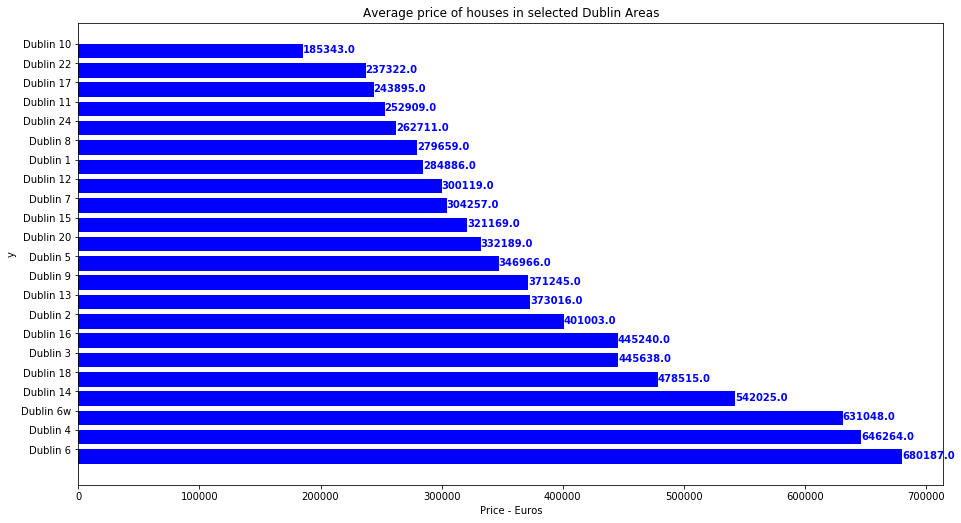

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt

x = df_avgprice.index
y = df_avgprice.price.round()

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Average price of houses in selected Dublin Areas')
plt.xlabel('Price - Euros')
plt.ylabel('y')   
fig.set_size_inches(15.5, 8.5, forward=True)
#plt.show()

for i, v in enumerate(y):
    ax.text(v + 4, i - .1, str(v), color='blue', fontweight='bold')
plt.savefig(os.path.join('House.png'), dpi=300, format='png', bbox_inches='tight') 

In [42]:
df_Similar = df_avgprice.loc[ ['Dublin 1','Dublin 2','Dublin 4','Dublin 7'] , : ]
df_Similar = df_Similar.sort_values(['price'],ascending = False)
df_Similar

price
postal_code               
Dublin 4     646263.994048
Dublin 2     401002.642857
Dublin 7     304257.275449
Dublin 1     284886.337030

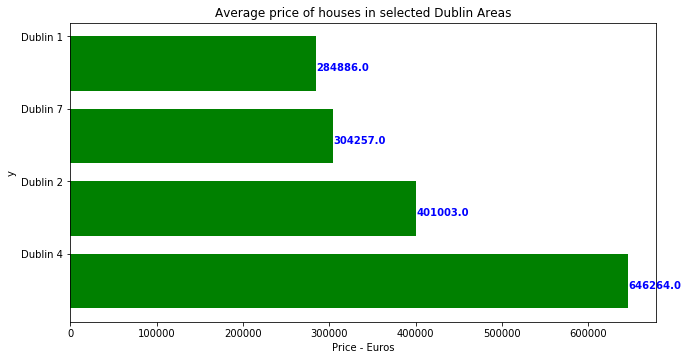

In [43]:
x = df_Similar.index
y = df_Similar.price.round()

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Average price of houses in selected Dublin Areas')
plt.xlabel('Price - Euros')
plt.ylabel('y')   
fig.set_size_inches(10.5, 5.5, forward=True)
#plt.show()

for i, v in enumerate(y):
    ax.text(v + 4, i - .1, str(v), color='blue', fontweight='bold')
plt.savefig(os.path.join('House.png'), dpi=300, format='png', bbox_inches='tight') 